In [32]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import tqdm
import datetime
import os
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

In [33]:
def runningmean(means,T):
    r=[]
    for i in range(T):
        r.append(np.nanmean(means[0:i+T+1]))

    for i in range(T,np.size(means)-T):
        r.append(np.nanmean(means[i-T:i+T+1]))

    for i in range(np.size(means)-T,np.size(means)+1):
        r.append(np.nanmean(means[i-T:]))

    return r

In [34]:
# import snow depth and all freeboard data from 01/01/2010 - 31/12/2020
CS2_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_CPOM_full.nc')['Radar Freeboard'][3560:3744])
CS2_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2_LARM_full.nc')['Radar Freeboard'][3560:3744])
CS2S3_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_CPOM_full.nc')['Radar Freeboard'][3560:3744])
CS2S3_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/CS2S3_LARM_full.nc')['Radar Freeboard'][3560:3744])
AK_LARM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/AK_LARM_full.nc')['Radar Freeboard'][3560:3744])
AK_CPOM = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/AK_CPOM_full.nc')['Radar Freeboard'][3560:3744])
IS2 = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/freeboard_daily_interpolated/IS2_full.nc')['Laser Freeboard'][3560:3744])
SNOW = np.asarray(Dataset('/Users/carmennab/Dropbox/OI_PolarSnow/EASE/data/SMLG_snod_EASE.nc')['Snow Depth'][3560:3744])

In [35]:
cs2_cpom = [] ; cs2_larm = [] ; snow = [] ; ak_cpom = [] ; is2 = [] ; cs2s3_cpom = [] ; cs2s3_larm = [] ; ak_larm = []
means = [cs2_cpom,cs2_larm, snow, ak_cpom, is2, cs2s3_cpom, cs2s3_larm, ak_larm]
datasets = [CS2_CPOM, CS2_LARM, SNOW, AK_CPOM, IS2, CS2S3_CPOM, CS2S3_LARM, AK_LARM]

for data, mean in zip(datasets, means):
    for d in data:
        mean.append(np.nanmean(d))

### plot seasonal daily means

<Figure size 432x288 with 0 Axes>

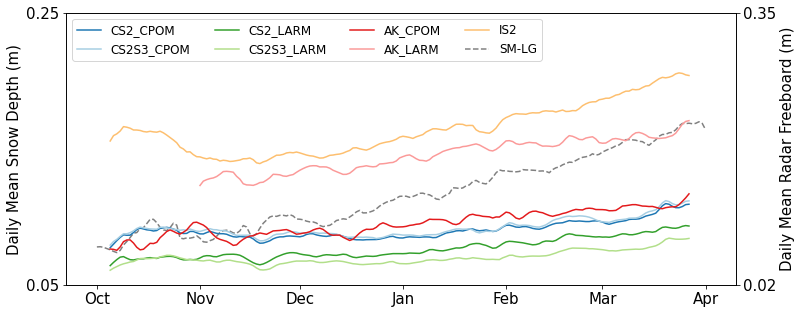

In [36]:
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(12,5))

days = np.arange(0,len(snow))
ax.plot(days,snow,color='grey',linestyle='dashed')
ax.set_ylim([0.05, 0.25])
ax.set_ylabel('Daily Mean Snow Depth (m)',fontsize=15)
ax.yaxis.set_major_locator(ticker.LinearLocator(2))
ax.tick_params(labelsize=15)
ax1b = ax.twinx()
ax1b.plot(days,cs2_cpom,label='CS2_CPOM',color='#1f78b4')
ax1b.plot(days,cs2s3_cpom,label='CS2S3_CPOM',color='#a6cee3')
ax1b.plot(days,cs2_larm,label='CS2_LARM',color='#33a02c')
ax1b.plot(days,cs2s3_larm,label='CS2S3_LARM',color='#b2df8a')
ax1b.plot(days,ak_cpom,label='AK_CPOM',color='#e31a1c')
ax1b.plot(days,ak_larm,label='AK_LARM',color='#fb9a99')
ax1b.plot(days,is2,label='IS2',color='#fdbf6f')
ax1b.tick_params(labelsize=15)
ax1b.set_ylabel('Daily Mean Radar Freeboard (m)',fontsize=15)
ax1b.set_ylim([0.02, 0.35])
ax1b.plot(days[40],[0],color='grey',label='SM-LG', linestyle='dashed')

ax1b.yaxis.set_major_locator(ticker.LinearLocator(2))
ax.set_xticks([0,31,61,92,123,152,183])
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])
ax1b.legend(loc='upper left', fontsize=12,ncol=4)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/supp_figs/retrack_daily_means.png',bbox_inches = "tight")